## Problem 1

### part a

In [1]:
import numpy as np

In [7]:
def f(x):
    # Define the function you want to optimize
    return x[0]**2 + x[1]**2

def gradient_f(x):
    # Compute the gradient of the function at point x
    return np.array([2 * x[0], 2 * x[1]])

def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x

    for i in range(num_iterations):
        gradient = gradient_f(x)
        x = x - learning_rate * gradient

    return x

# Set the initial point and learning rate
initial_point = np.array([1.0, 1.0])
learning_rate = 0.1
num_iterations = 100

# Run gradient descent
optimized_point = gradient_descent(initial_point, learning_rate, num_iterations)

print("Optimized point:", optimized_point)
print("Optimized function value:", f(optimized_point))


Optimized point: [2.03703598e-10 2.03703598e-10]
Optimized function value: 8.299031137761999e-20


In [ ]:
### idea for pseudocode??

# input any function
    # create np array of x_in = [-100, -99, ... , 0, ... , 99, 100]
    # create np array of y_in the same
    # f = the function to descend gradiently using x_in and y_in
        # this will give us an np array with all the function outputs?
# gradient = numpy.gradient(f)

In [6]:
n_epochs = 50
m = 100
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index : random_index+1]
            yi = y[random_index : random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

print(theta)

NameError: ignored

## Problem 2

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = mnist["data"], mnist["target"]


X = np.array(X)
# print(X_np[0])

# print(X)
X.shape
y.shape

(70000,)

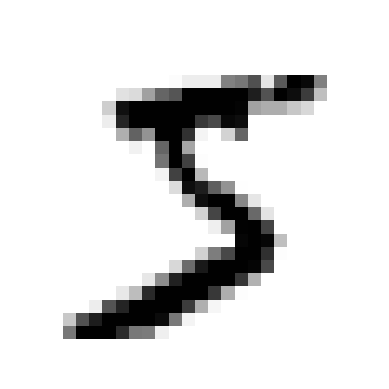

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
print(y[0])
y = y.astype(np.uint8)
# print(type(y))

5


In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# print(X_train, X_test, y_train, y_test)

### Binary Classifier

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

#### Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9546666666666667
0.96975
0.9635
0.9653333333333334
0.9484166666666667


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

1. OvA
2. Random Forest
3. KNeighbors (probably will work best)

## Validation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## OvA

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

some_digit_scores = sgd_clf.decision_function([some_digit])

y_train_ova_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_ova_pred, average="macro")

0.8780295041097735

OvA is slower, literally took 16 minutes for .87 f1

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

forest_clf.predict_proba([some_digit])

y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)
f1_score(y_train, y_train_forest_pred, average="macro")

0.9661919580821857

This is ok, but not a lot of room for hyperparams (or at least to the same extent as k neighbors)

## K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=5)
f1_score(y_multilabel, y_train_knn_pred, average="macro")



### TEST

y_test_large = (y_test >= 7)
y_test_odd = (y_test % 2 == 1)
y_multilabel_test = np.c_[y_test_large, y_test_odd]

y_test_knn_pred = cross_val_predict(knn_clf, X_test, y_multilabel_test, cv=5)
f1_score(y_multilabel_test, y_test_knn_pred, average="macro")

0.9625164092416195

KNN is probably best because fastest and close with forest, hyperparams could probably help KNN better than forest